In [121]:
import pandas as pd
df=pd.read_csv("/content/ecommerce_orders_fixed.csv")

In [122]:
df

,Order_ID,Customer_Name,Product,Category,Quantity,Price,Order_Date,Delivery_Status
0,ORD00001,David,Camera,Accessories,3.0,968.79,2025-06-12,Delivered
1,ORD00002,Bob,Headphones,Electronics,4.0,869.81,NaN,Pending
2,ORD00003,NaN,Gaming Console,Electronics,NaN,903.64,2025-07-9,Pending
3,ORD00004,Bob,Laptop,Gadgets,2.0,762.42,2025-07-28,Delivered
4,ORD00005,Bob,Camera,Gadgets,4.0,304.83,2025-08-11,Canceled
...,...,...,...,...,...,...,...,...
995,ORD00996,Frank,Headphones,Gadgets,4.0,NaN,2025-08-4,Canceled
996,ORD00997,Bob,Tablet,Gadgets,3.0,353.16,2025-08-2,Pending
997,ORD00998,Eve,Gaming Console,Accessories,1.0,190.69,2025-06-11,Canceled
998,ORD00999,Charlie,Smartwatch,Accessories,4.0,435.99,2025-05-10,Delivered


In [123]:
df.head()

,Order_ID,Customer_Name,Product,Category,Quantity,Price,Order_Date,Delivery_Status
0,ORD00001,David,Camera,Accessories,3.0,968.79,2025-06-12,Delivered
1,ORD00002,Bob,Headphones,Electronics,4.0,869.81,NaN,Pending
2,ORD00003,NaN,Gaming Console,Electronics,NaN,903.64,2025-07-9,Pending
3,ORD00004,Bob,Laptop,Gadgets,2.0,762.42,2025-07-28,Delivered
4,ORD00005,Bob,Camera,Gadgets,4.0,304.83,2025-08-11,Canceled


In [124]:
df.tail()

,Order_ID,Customer_Name,Product,Category,Quantity,Price,Order_Date,Delivery_Status
995,ORD00996,Frank,Headphones,Gadgets,4.0,NaN,2025-08-4,Canceled
996,ORD00997,Bob,Tablet,Gadgets,3.0,353.16,2025-08-2,Pending
997,ORD00998,Eve,Gaming Console,Accessories,1.0,190.69,2025-06-11,Canceled
998,ORD00999,Charlie,Smartwatch,Accessories,4.0,435.99,2025-05-10,Delivered
999,ORD01000,Eve,Laptop,Accessories,3.0,476.54,2025-09-18,Delivered


In [125]:
df.isnull().sum()

,0
Order_ID,0
Customer_Name,189
Product,0
Category,0
Quantity,149
Price,98
Order_Date,143
Delivery_Status,0


In [126]:
int(df.duplicated().sum())

0

In [155]:
df.columns

Index(['Order_ID', 'Customer_Name', 'Product', 'Category', 'Quantity', 'Price',
       'Order_Date', 'Delivery_Status', 'Total_Revenue'],
      dtype='object')

In [128]:
df.shape

(1000, 8)

In [129]:
df.dtypes

,0
Order_ID,object
Customer_Name,object
Product,object
Category,object
Quantity,float64
Price,float64
Order_Date,object
Delivery_Status,object


In [130]:
df.fillna({'Quantity':df['Quantity'].mean(),'Price':df['Price'].mean() }, inplace=True)

In [131]:
df.isnull().sum()

,0
Order_ID,0
Customer_Name,189
Product,0
Category,0
Quantity,0
Price,0
Order_Date,143
Delivery_Status,0


In [132]:
df.fillna({'Customer_Name': 'Smith'}, inplace=True)
df['Order_Date'] = df['Order_Date'].ffill() #order date values fill with previous date


In [133]:
df.isnull().sum()

,0
Order_ID,0
Customer_Name,0
Product,0
Category,0
Quantity,0
Price,0
Order_Date,0
Delivery_Status,0


In [134]:
df

,Order_ID,Customer_Name,Product,Category,Quantity,Price,Order_Date,Delivery_Status
0,ORD00001,David,Camera,Accessories,3.000000,968.790000,2025-06-12,Delivered
1,ORD00002,Bob,Headphones,Electronics,4.000000,869.810000,2025-06-12,Pending
2,ORD00003,Smith,Gaming Console,Electronics,2.977673,903.640000,2025-07-9,Pending
3,ORD00004,Bob,Laptop,Gadgets,2.000000,762.420000,2025-07-28,Delivered
4,ORD00005,Bob,Camera,Gadgets,4.000000,304.830000,2025-08-11,Canceled
...,...,...,...,...,...,...,...,...
995,ORD00996,Frank,Headphones,Gadgets,4.000000,527.459224,2025-08-4,Canceled
996,ORD00997,Bob,Tablet,Gadgets,3.000000,353.160000,2025-08-2,Pending
997,ORD00998,Eve,Gaming Console,Accessories,1.000000,190.690000,2025-06-11,Canceled
998,ORD00999,Charlie,Smartwatch,Accessories,4.000000,435.990000,2025-05-10,Delivered


1️⃣ Customer Retention Analysis (Repeat Customers)


In [135]:
customer_orders = df['Customer_Name'].value_counts()
repeat_customers = customer_orders[customer_orders > 1]  # Customers with multiple orders
print(repeat_customers.head(10))  # Top 10 repeat customers


Customer_Name
Smith      189
Jack       104
Charlie     90
Grace       87
Bob         84
Eve         81
Frank       81
Alice       79
Ivy         70
Hannah      68
Name: count, dtype: int64


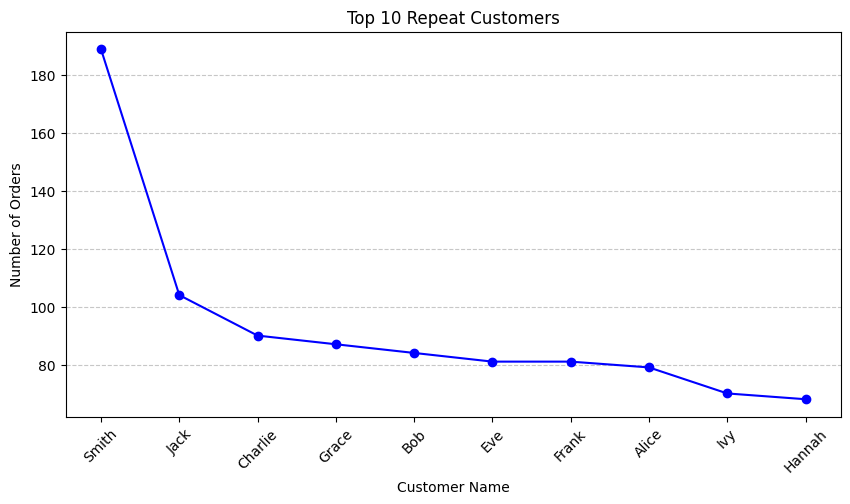

In [136]:
import matplotlib.pyplot as plt

# Count repeat customers
customer_orders = df['Customer_Name'].value_counts()
repeat_customers = customer_orders[customer_orders > 1].head(10)  # Top 10 repeat customers

# Plot line graph
plt.figure(figsize=(10, 5))
plt.plot(repeat_customers.index, repeat_customers.values, marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Customer Name")
plt.ylabel("Number of Orders")
plt.title("Top 10 Repeat Customers")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()


In [137]:
top_spenders = df.groupby('Customer_Name')['Price'].sum().sort_values(ascending=False).round()
print(top_spenders.head(10))  # Top 10 spending customers


Customer_Name
Smith      102376.0
Jack        53888.0
Charlie     48233.0
Grace       47300.0
Bob         46379.0
Eve         43284.0
Frank       42835.0
Alice       39903.0
Hannah      36920.0
Ivy         34776.0
Name: Price, dtype: float64


In [138]:
df['Total_Revenue'] = df['Quantity'] * df['Price']
total_revenue = df['Total_Revenue'].sum()
print("Total Revenue:", total_revenue)


Total Revenue: 1560994.530947444


In [139]:
top_customers = df.groupby('Customer_Name')['Total_Revenue'].sum().sort_values(ascending=False)
print(top_customers.head(10))  # Top 10 spending customers


Customer_Name
Smith      307941.826739
Jack       152086.807873
Charlie    149959.688434
Bob        141933.992232
Grace      138940.168679
Alice      123745.759093
Eve        121238.891811
Hannah     114477.155571
Frank      114067.862501
Ivy         99962.666314
Name: Total_Revenue, dtype: float64


In [140]:
top_products = df.groupby('Product')['Quantity'].sum().sort_values(ascending=False)
print(top_products.head(10))  # Top 10 best-selling products


Product
Tablet            450.397180
Camera            446.486486
Smartwatch        442.464160
Headphones        432.821387
Gaming Console    426.397180
Laptop            416.575793
Mobile Phone      362.531140
Name: Quantity, dtype: float64


In [141]:
category_sales = df.groupby('Category')['Total_Revenue'].sum().sort_values(ascending=False)
print(category_sales)


Category
Electronics    527678.289172
Accessories    526795.541848
Gadgets        506520.699927
Name: Total_Revenue, dtype: float64


In [142]:
order_status_counts = df['Delivery_Status'].value_counts()
print(order_status_counts)


Delivery_Status
Pending      347
Delivered    341
Canceled     312
Name: count, dtype: int64


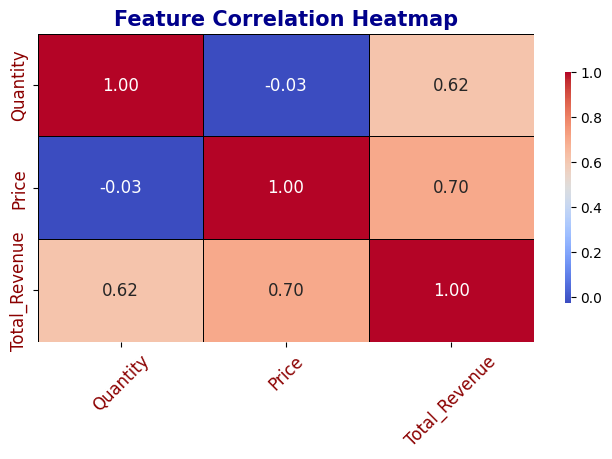

In [143]:
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt='.2f',
    linewidths=0.5,
    linecolor='black',
    annot_kws={"size": 12},
    cbar_kws={"shrink": 0.75, "aspect": 40}
)
plt.title("Feature Correlation Heatmap", fontsize=15, fontweight='bold', color='darkblue')
plt.xticks(fontsize=12, rotation=45, color='darkred')
plt.yticks(fontsize=12, color='darkred')
plt.show()

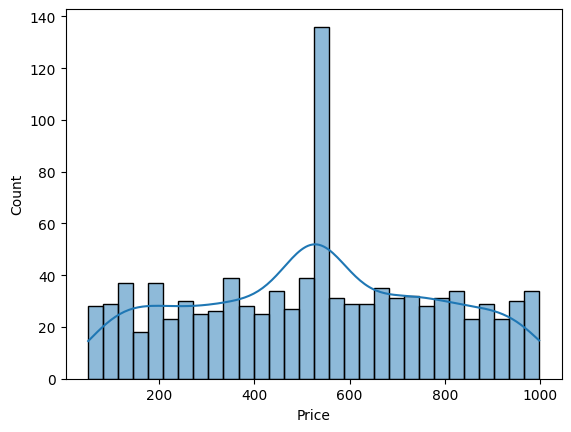

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(numeric_df['Price'], kde=True, bins=30)
plt.show()


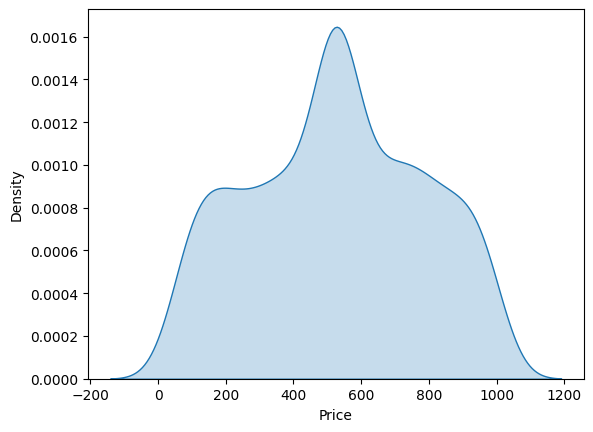

In [145]:
sns.kdeplot(numeric_df['Price'], fill=True)
plt.show()


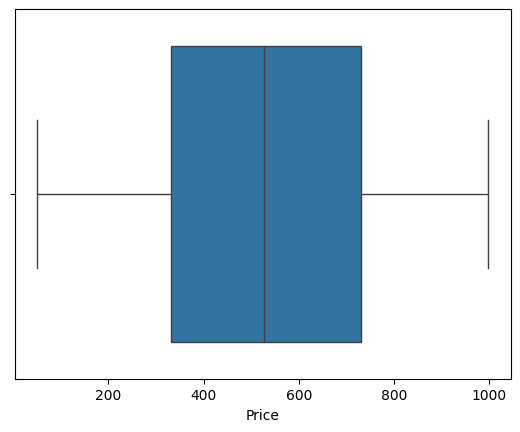

In [146]:
sns.boxplot(x=numeric_df['Price'])
plt.show()


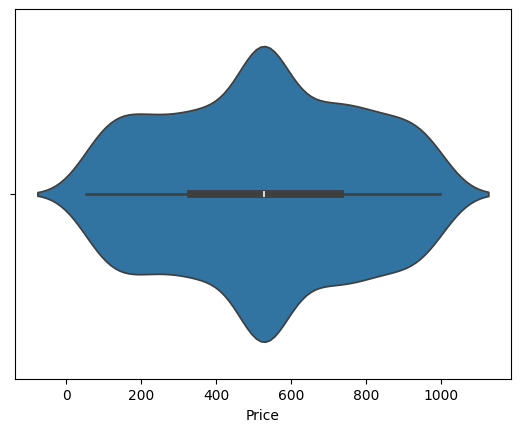

In [147]:
sns.violinplot(x=numeric_df['Price'])
plt.show()


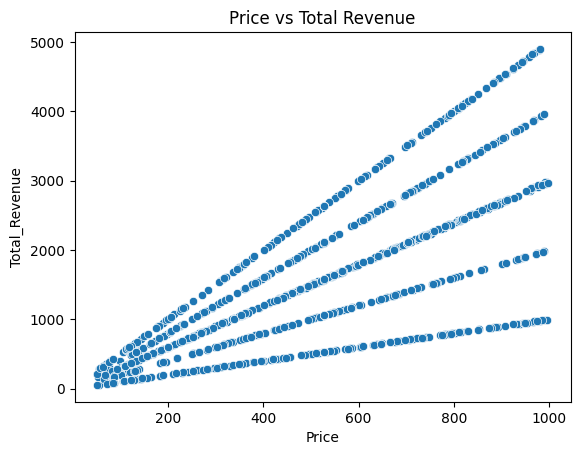

In [148]:
sns.scatterplot(x=numeric_df['Price'], y=numeric_df['Total_Revenue'])
plt.title("Price vs Total Revenue")
plt.show()


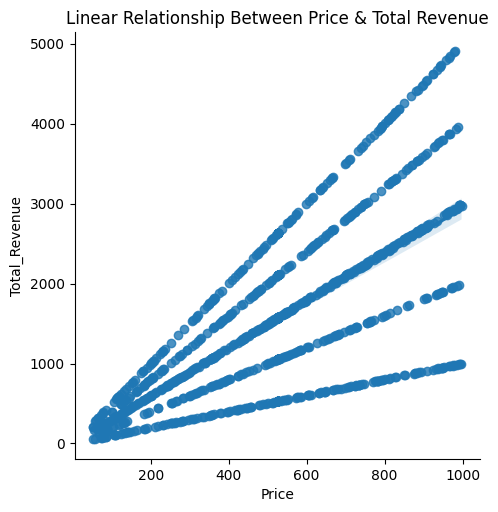

In [149]:
sns.lmplot(x="Price", y="Total_Revenue", data=numeric_df)
plt.title("Linear Relationship Between Price & Total Revenue")
plt.show()


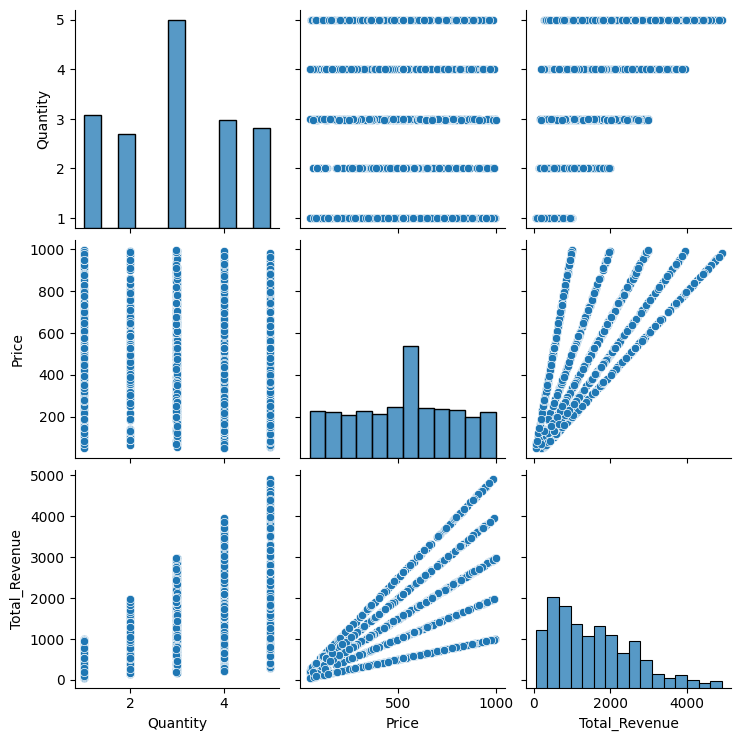

In [150]:
sns.pairplot(numeric_df, kind="scatter")
plt.show()


In [151]:
df.columns

Index(['Order_ID', 'Customer_Name', 'Product', 'Category', 'Quantity', 'Price',
       'Order_Date', 'Delivery_Status', 'Total_Revenue'],
      dtype='object')

In [152]:
# 🔹 Print column names to confirm the DataFrame is loaded
print("Columns in DataFrame:", df.columns)


Columns in DataFrame: Index(['Order_ID', 'Customer_Name', 'Product', 'Category', 'Quantity', 'Price',
       'Order_Date', 'Delivery_Status', 'Total_Revenue'],
      dtype='object')


In [153]:
import pandas as pd
import plotly.express as px



# 🔹 Count occurrences of each Delivery_Status
status_counts = df['Delivery_Status'].value_counts().reset_index()
status_counts.columns = ['Delivery_Status', 'Count']

# 🔹 Create a pie chart
fig = px.pie(status_counts,
             names='Delivery_Status',
             values='Count',
             title="Order Delivery Status Distribution",
             color_discrete_sequence=px.colors.qualitative.Set3)  # Color theme

# 🔹 Show the chart
fig.show()


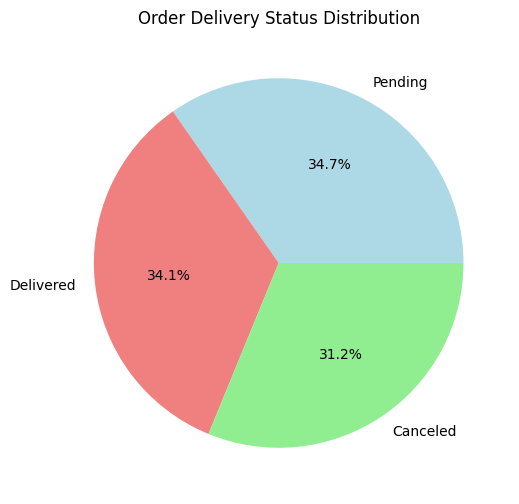

In [154]:
status_counts = df['Delivery_Status'].value_counts()

# 🔹 Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title("Order Delivery Status Distribution")
plt.show()

In [156]:
df.columns

Index(['Order_ID', 'Customer_Name', 'Product', 'Category', 'Quantity', 'Price',
       'Order_Date', 'Delivery_Status', 'Total_Revenue'],
      dtype='object')

In [159]:
# Ensure df_dept_sales is defined first
df_dept_sales = df.groupby("Category")["Total_Revenue"].sum().sort_values(ascending=False)


In [160]:
df_dept_avg_order = df.groupby("Category")["Total_Revenue"].mean().sort_values(ascending=False)
df_dept_sales_percentage = (df_dept_sales / df_dept_sales.sum()) * 100
df_dept_analysis = pd.DataFrame({
    "Total Revenue": df_dept_sales,
    "Average Order Value": df_dept_avg_order,
    "Revenue Contribution (%)": df_dept_sales_percentage
}).reset_index()
print(df_dept_analysis)


      Category  Total Revenue  Average Order Value  Revenue Contribution (%)
0  Accessories  526795.541848          1531.382389                 33.747430
1  Electronics  527678.289172          1608.775272                 33.803981
2      Gadgets  506520.699927          1544.270427                 32.448589


<ipython-input-163-a8644ce84a4a>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




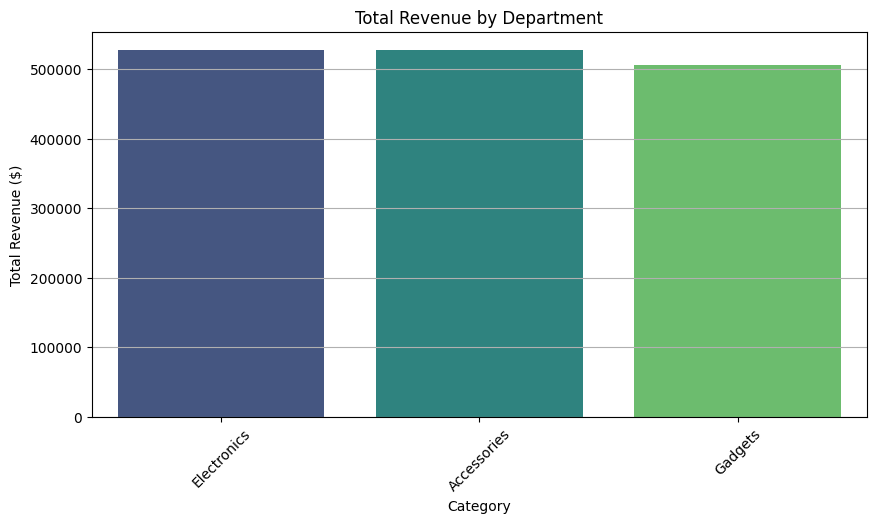

In [163]:
df_dept_sales = df.groupby("Category")["Total_Revenue"].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=df_dept_sales.index, y=df_dept_sales.values, palette="viridis")
plt.xticks(rotation=45)
plt.title("Total Revenue by Department")
plt.xlabel("Category")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y')
plt.show()


In [165]:
df_top_products = df.groupby(["Category", "Product"])['Quantity'].sum().reset_index()
df_top_products = df_top_products.sort_values(["Category", "Quantity"], ascending=[True, False]).groupby("Category").head(1)
print("Best-Selling Products per Department:")
print(df_top_products)


Best-Selling Products per Department:
       Category     Product    Quantity
0   Accessories      Camera  159.799060
9   Electronics  Headphones  155.955347
17      Gadgets      Laptop  160.821387


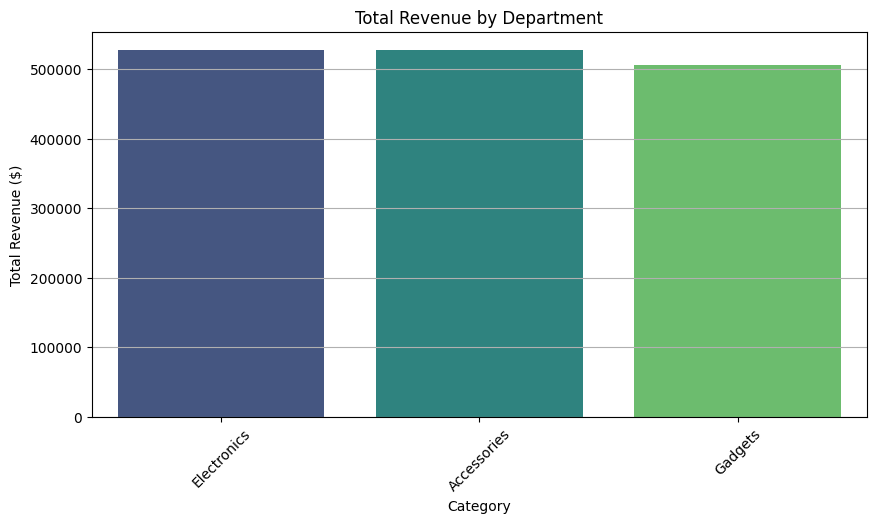

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt

df_dept_sales = df.groupby("Category")["Total_Revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_dept_sales.index, y=df_dept_sales.values, hue=df_dept_sales.index, palette="viridis", legend=False)
plt.xticks(rotation=45)
plt.title("Total Revenue by Department")
plt.xlabel("Category")
plt.ylabel("Total Revenue ($)")
plt.grid(axis='y')
plt.show()


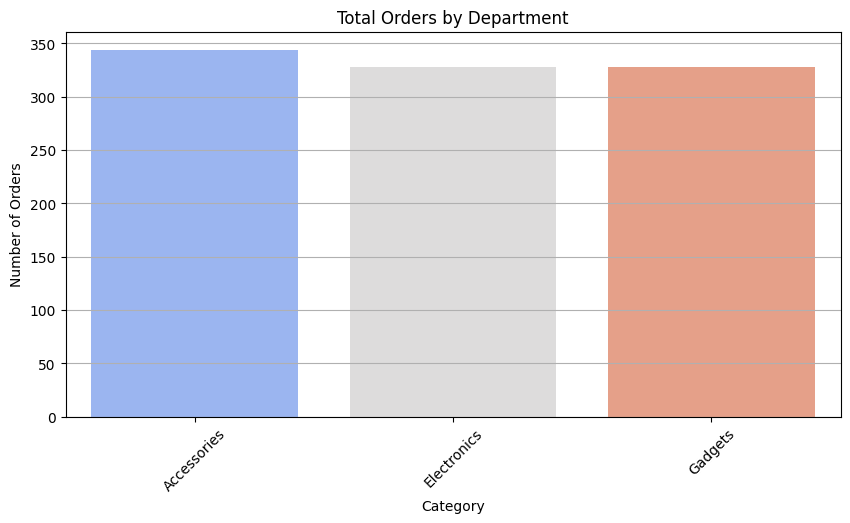

Category
Accessories    344
Electronics    328
Gadgets        328
Name: Order_ID, dtype: int64


In [168]:
df_dept_orders = df.groupby("Category")["Order_ID"].count().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_dept_orders.index, y=df_dept_orders.values, hue=df_dept_orders.index, palette="coolwarm", legend=False)
plt.xticks(rotation=45)
plt.title("Total Orders by Department")
plt.xlabel("Category")
plt.ylabel("Number of Orders")
plt.grid(axis='y')
plt.show()

print(df_dept_orders)


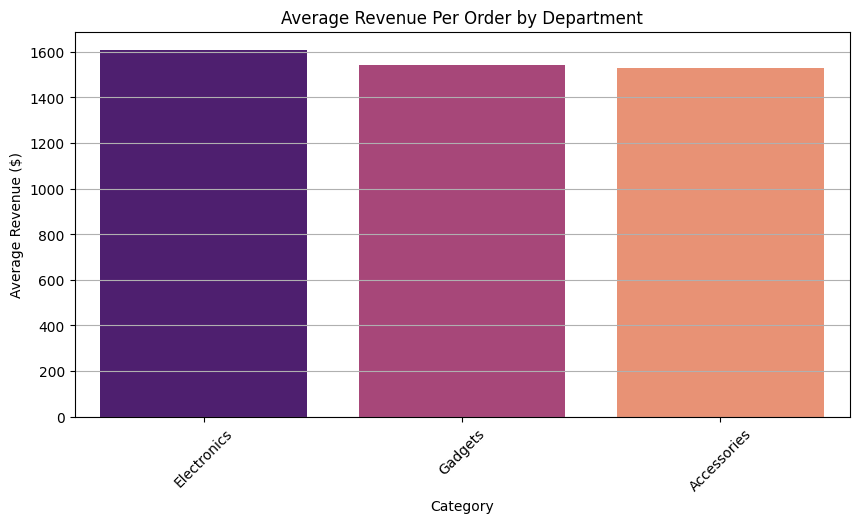

Category
Electronics    1608.775272
Gadgets        1544.270427
Accessories    1531.382389
Name: Total_Revenue, dtype: float64


In [169]:
df_avg_revenue = df.groupby("Category")["Total_Revenue"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=df_avg_revenue.index, y=df_avg_revenue.values, hue=df_avg_revenue.index, palette="magma", legend=False)
plt.xticks(rotation=45)
plt.title("Average Revenue Per Order by Department")
plt.xlabel("Category")
plt.ylabel("Average Revenue ($)")
plt.grid(axis='y')
plt.show()

print(df_avg_revenue)


In [170]:
df_top5_products = df.groupby(["Category", "Product"])["Quantity"].sum().reset_index()
df_top5_products = df_top5_products.sort_values(["Category", "Quantity"], ascending=[True, False]).groupby("Category").head(5)

print("Top 5 Best-Selling Products in Each Department:")
print(df_top5_products)


Top 5 Best-Selling Products in Each Department:
       Category         Product    Quantity
0   Accessories          Camera  159.799060
5   Accessories      Smartwatch  148.843713
1   Accessories  Gaming Console  147.754407
4   Accessories    Mobile Phone  141.843713
2   Accessories      Headphones  139.933020
9   Electronics      Headphones  155.955347
13  Electronics          Tablet  153.732080
8   Electronics  Gaming Console  149.843713
7   Electronics          Camera  148.821387
12  Electronics      Smartwatch  141.843713
17      Gadgets          Laptop  160.821387
20      Gadgets          Tablet  156.843713
19      Gadgets      Smartwatch  151.776733
14      Gadgets          Camera  137.866040
16      Gadgets      Headphones  136.933020


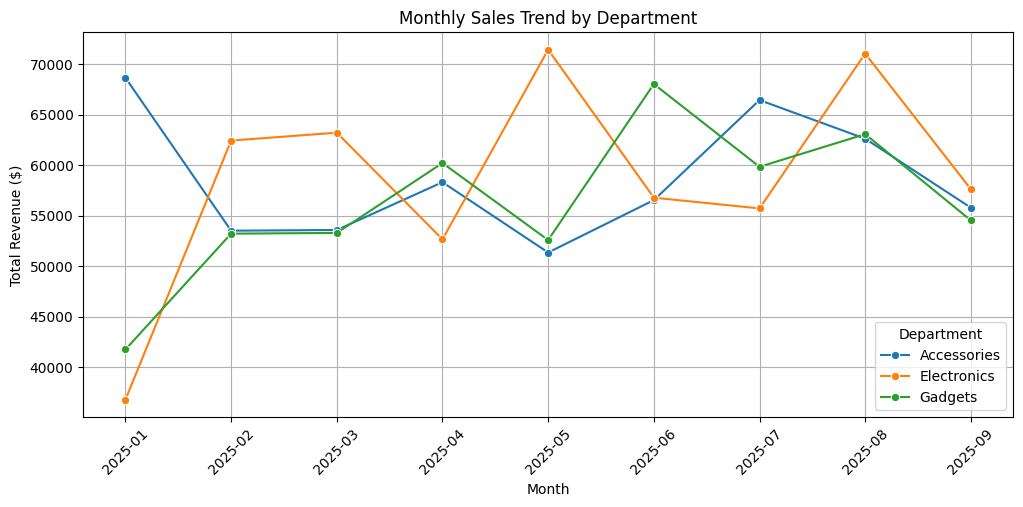

In [177]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"], errors="coerce")  # Ensure datetime format
df["Month"] = df["Order_Date"].dt.to_period("M").astype(str)  # Convert Period to String

df_monthly_sales = df.groupby(["Month", "Category"])["Total_Revenue"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_monthly_sales, x="Month", y="Total_Revenue", hue="Category", marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend by Department")
plt.xlabel("Month")
plt.ylabel("Total Revenue ($)")
plt.grid(True)
plt.legend(title="Department")
plt.show()


In [186]:
df["Delivery_Status"].value_counts()


,count
Delivery_Status,
Pending,347
Delivered,341
Canceled,312


In [200]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "DejaVu Sans"  # Safe option



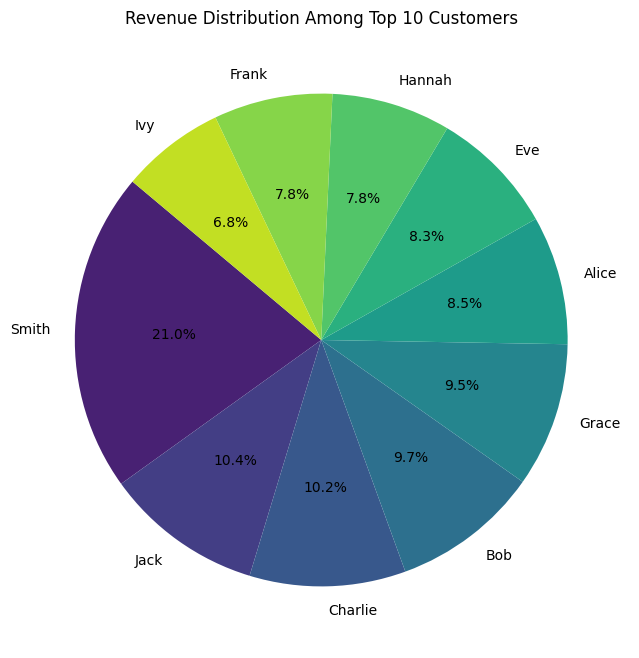

In [201]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get a colormap with enough colors
colors = sns.color_palette("viridis", len(df_customer_revenue))

plt.figure(figsize=(8, 8))
plt.pie(df_customer_revenue["Total_Revenue"],
        labels=df_customer_revenue["Customer_Name"],
        autopct='%1.1f%%',
        startangle=140,
        colors=colors)  # Fixed: Use 'colors' instead of 'cmap'

plt.title("Revenue Distribution Among Top 10 Customers")
plt.show()
